## Imports

In [78]:
import keras
import pickle
import matplotlib.pyplot as plt
import time
import numpy as np

import keras.layers as l
import keras.backend as K

import keras.optimizers as o
import keras.models as m
from keras.utils import to_categorical


## Load the dataset

In [71]:
# 28x28 images of hand wirtten digits 0-9

mnist = keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [72]:
# normalize it
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

y_train = to_categorical(y_train.reshape([-1, 1])) # without this need sparse categoricaly
y_test = to_categorical(y_test.reshape([-1, 1]))

(60000, 28, 28)
(10000, 28, 28)


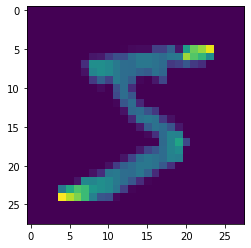

In [73]:
print(x_train.shape)
print(x_test.shape)

# print(x_train[0])

plt.imshow(x_train[0])
plt.show()

In [85]:

# function to obtain grads for each parameter
def get_gradients(model, inputs, outputs):
    grads = model.optimizer.get_gradients(model.total_loss, model.trainable_weights)
    symb_inputs = (model._feed_inputs + model._feed_targets + model._feed_sample_weights)
    f = K.function(symb_inputs, grads)
    x, y, weight = model._standardize_user_data(inputs, outputs)
    output_grad = f(x + y + weight)
    return np.array(output_grad)

## Set some parameters 

In [67]:
hidden_layers = [5, 20, 40]
activation_functions = ["relu", "tanh", "sigmoid"] 

## Create the networks

In [121]:
start_t = time.time()
all_max_grads = {}

# for hlayers in hidden_layers:
    
for af in activation_functions:
    model_t = time.time()
    print("---Model overview: Hidden layers: ", hlayers, " Activation Function: ", af)

    model = m.Sequential()
#     model.add(l.Flatten()) ## no flatten is asked!!!

    # hidden layers
    for i in range(20):
        model.add(l.Dense(32, input_shape=(28,28), activation=af))# activation_function))

    # output layer
    model.add(l.Dense(10, activation='softmax'))
    sgd = o.SGD(lr=0.01)


    model.compile(
        optimizer=sgd,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.fit(x_train, y_train, epochs=3, validation_data = (x_test,y_test))

    print("------------------------Model time: ", time.time()-model_t)
    
    # store max grads for the plots
    grads = get_gradients(model, x_train[0:1], y_train[0:1])
    max_grads = []
    for i,_ in enumerate(grads):
        if(i % 2 == 0 or i==len(grads)-1):
            continue
        max_grads.append(np.max(grads[i]))
    
    all_max_grads[af] = max_grads
    
        
print("Total time: ", time.time() - start_t)

---Model overview: Hidden layers:  40  Activation Function:  relu
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 55us/step - loss: 2.3012 - accuracy: 0.1117 - val_loss: 2.3001 - val_accuracy: 0.1135
Epoch 2/3
60000/60000 [==============================] - 3s 53us/step - loss: 2.2913 - accuracy: 0.1205 - val_loss: 2.2410 - val_accuracy: 0.1872
Epoch 3/3
60000/60000 [==============================] - 3s 54us/step - loss: 1.7283 - accuracy: 0.3077 - val_loss: 1.3269 - val_accuracy: 0.4501
------------------------Model time:  10.675672769546509
---Model overview: Hidden layers:  40  Activation Function:  tanh
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 54us/step - loss: 0.9894 - accuracy: 0.6968 - val_loss: 0.5356 - val_accuracy: 0.8436
Epoch 2/3
60000/60000 [==============================] - 3s 49us/step - loss: 0.4413 - accuracy: 0.8763 - val_loss: 0.3584 - val

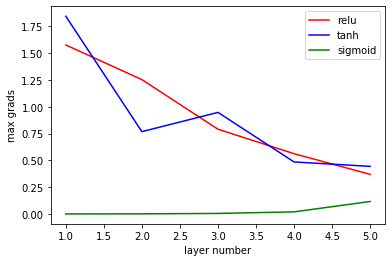

In [120]:
# 5
colors = ['r','b', 'g']
for i,af_grads in enumerate(all_max_grads):
    plt.plot(range(1, len(all_max_grads[af_grads])+1), all_max_grads[af_grads], colors[i],  label=af_grads)
    
plt.ylabel('max grads')
plt.xlabel('layer number')
plt.legend()
plt.show()

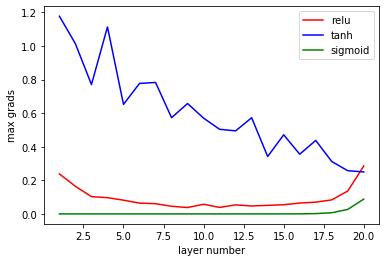

In [122]:
# 20
colors = ['r','b', 'g']
for i,af_grads in enumerate(all_max_grads):
    plt.plot(range(1, len(all_max_grads[af_grads])+1), all_max_grads[af_grads], colors[i],  label=af_grads)
    
plt.ylabel('max grads')
plt.xlabel('layer number')
plt.legend()
plt.show()

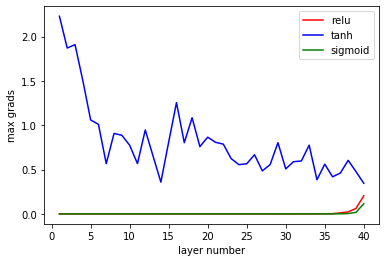

In [118]:
# 40
colors = ['r','b', 'g']
for i,af_grads in enumerate(all_max_grads):
    plt.plot(range(1, len(all_max_grads[af_grads])+1), all_max_grads[af_grads], colors[i],  label=af_grads)
    
plt.ylabel('max grads')
plt.xlabel('layer number')
plt.legend()
plt.show()

## LeCunn

In [132]:
def leCunn_af(x):
    return 1.7159 * K.tanh((2/3)*x)+0.01*x 

In [133]:
model_t = time.time()
print("---Model overview: Hidden layers: ", hlayers, " Activation Function: ", af)

model = m.Sequential()
model.add(l.Flatten())

# hidden layers
for i in range(20):
    model.add(l.Dense(32, input_shape=(28,28), activation=leCunn_af))

# output layer
model.add(l.Dense(10, activation='softmax'))
sgd = o.SGD(lr=0.01)


model.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=3, validation_data = (x_test,y_test))

print("------------------------Model time: ", time.time()-model_t)

---Model overview: Hidden layers:  40  Activation Function:  sigmoid
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.5876 - accuracy: 0.8244 - val_loss: 0.3313 - val_accuracy: 0.9083
Epoch 2/3
60000/60000 [==============================] - 4s 65us/step - loss: 0.2990 - accuracy: 0.9136 - val_loss: 0.2695 - val_accuracy: 0.9221
Epoch 3/3
60000/60000 [==============================] - 4s 61us/step - loss: 0.2456 - accuracy: 0.9273 - val_loss: 0.2394 - val_accuracy: 0.9302
------------------------Model time:  14.05679440498352


No handles with labels found to put in legend.


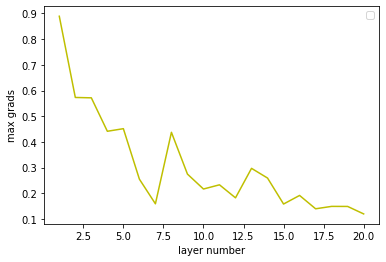

In [136]:
grads = get_gradients(model, x_train[0:1], y_train[0:1])
max_grads = []
for i,_ in enumerate(grads):
    if(i % 2 == 0 or i==len(grads)-1):
        continue
    max_grads.append(np.max(grads[i]))

    
plt.plot(range(1, len(max_grads)+1), max_grads, 'y')
    
plt.ylabel('max grads')
plt.xlabel('layer number')
plt.legend()
plt.show()

        

## test for geo at 10 epochs

In [75]:
model_t = time.time()
print("---Model overview: Hidden layers: ", hlayers, " Activation Function: ", af)

model = m.Sequential()
model.add(l.Flatten())

# hidden layers
for i in range(20):
    model.add(l.Dense(32, input_shape=(28,28), activation='relu'))# activation_function))

# output layer
model.add(l.Dense(10, activation='softmax'))
sgd = o.SGD(lr=0.01)


model.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10, validation_data = (x_test,y_test))

print("------------------------Model time: ", time.time()-model_t)

---Model overview: Hidden layers:  40  Activation Function:  sigmoid
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/step - loss: 2.2672 - accuracy: 0.1463 - val_loss: 2.0507 - val_accuracy: 0.2106
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 1.6391 - accuracy: 0.3179 - val_loss: 1.4816 - val_accuracy: 0.3810
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 1.1116 - accuracy: 0.5664 - val_loss: 0.8373 - val_accuracy: 0.6938
Epoch 4/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.6838 - accuracy: 0.7861 - val_loss: 0.5415 - val_accuracy: 0.8649
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.4464 - accuracy: 0.8844 - val_loss: 0.3528 - val_accuracy: 0.9113
Epoch 6/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3400 - accuracy: 0.9137 - val_loss: 0.3105 - val_accuracy: 0.9267

shape:  (42,)
---
1 layer  (32,)
max of  1  is:  0.75207615
3 layer  (32,)
max of  3  is:  0.58213687
5 layer  (32,)
max of  5  is:  0.45399648
7 layer  (32,)
max of  7  is:  0.40871465
9 layer  (32,)
max of  9  is:  0.45888668
11 layer  (32,)
max of  11  is:  0.43653584
13 layer  (32,)
max of  13  is:  0.32461357
15 layer  (32,)
max of  15  is:  0.3119303
17 layer  (32,)
max of  17  is:  0.23301727
19 layer  (32,)
max of  19  is:  0.39234194
21 layer  (32,)
max of  21  is:  0.35182214
23 layer  (32,)
max of  23  is:  0.31854022
25 layer  (32,)
max of  25  is:  0.24456888
27 layer  (32,)
max of  27  is:  0.24219668
29 layer  (32,)
max of  29  is:  0.13335884
31 layer  (32,)
max of  31  is:  0.14200322
33 layer  (32,)
max of  33  is:  0.13032338
35 layer  (32,)
max of  35  is:  0.08454664
37 layer  (32,)
max of  37  is:  0.10113288
39 layer  (32,)
max of  39  is:  0.06871333
41 layer  (10,)
max of  41  is:  0.06891517
